In [50]:
import pandas as pd

df_coffee = pd.read_feather('data/coffee_ratings_full.feather')
df_coffee


,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,90.58,Arabica,metad plc,Ethiopia,metad plc,None,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,89.92,Arabica,metad plc,Ethiopia,metad plc,None,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,89.75,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",None,None,None,None,1600 - 1800 m,...,None,0.0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,89.00,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,None,wolensu,None,yidnekachew debessa coffee plantation,1800-2200,...,Green,2.0,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,88.83,Arabica,metad plc,Ethiopia,metad plc,None,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,78.75,Robusta,luis robles,Ecuador,robustasa,Lavado 1,our own lab,None,robustasa,None,...,Blue-Green,1.0,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN
1334,78.08,Robusta,luis robles,Ecuador,robustasa,Lavado 3,own laboratory,None,robustasa,40,...,Blue-Green,0.0,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,40.0,40.0,40.0
1335,77.17,Robusta,james moore,United States,fazenda cazengo,None,cafe cazengo,None,global opportunity fund,795 meters,...,None,6.0,"December 23rd, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,795.0,795.0,795.0
1336,75.08,Robusta,cafe politico,India,None,None,None,14-1118-2014-0087,cafe politico,None,...,Green,1.0,"August 25th, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN


In [52]:
coffee_focus = df_coffee[['variety','country_of_origin','flavor']]
coffee_focus = coffee_focus.reset_index() #reset_index() fonksiyonu, satırların eski indeksini sıfırlar ve bu indeks yeni bir sütun olarak 'index' adıyla eklenir. Yani, eski indeks değerleri coffee_focus DataFrame'inde index adlı bir sütun olarak bulunur.
coffee_focus

,index,variety,country_of_origin,flavor
0,0,None,Ethiopia,8.83
1,1,Other,Ethiopia,8.67
2,2,Bourbon,Guatemala,8.50
3,3,None,Ethiopia,8.58
4,4,Other,Ethiopia,8.50
...,...,...,...,...
1333,1333,None,Ecuador,7.58
1334,1334,None,Ecuador,7.67
1335,1335,None,United States,7.33
1336,1336,None,India,6.83


In [54]:
coffee_resamp = coffee_focus.sample(frac=1, replace=True)
coffee_resamp

,index,variety,country_of_origin,flavor
1263,1263,Typica,Mexico,6.58
376,376,Bourbon,Guatemala,7.75
520,520,Bourbon,Mexico,7.67
1042,1042,Caturra,Panama,7.33
422,422,Caturra,Colombia,7.67
...,...,...,...,...
53,53,SL14,Uganda,8.17
627,627,Typica,Mexico,7.58
199,199,Other,Colombia,7.75
267,267,None,Colombia,7.75


In [56]:
coffee_focus['index'].value_counts()

index
0       1
898     1
896     1
895     1
894     1
       ..
445     1
444     1
443     1
442     1
1337    1
Name: count, Length: 1338, dtype: int64

In [58]:
num_unique_coffees = len(coffee_resamp.drop_duplicates(subset='index'))
num_unique_coffees

862

In [60]:
import numpy as np

mean_flavors_1000 = []

for i in range(1000):
    mean_flavors_1000.append(np.mean(
        coffee_focus.sample(frac=1, replace=True)['flavor']))

(array([  5.,  17.,  71., 138., 226., 252., 173.,  74.,  31.,  13.]),
 array([7.49721226, 7.50272945, 7.50824664, 7.51376383, 7.51928102,
        7.52479821, 7.5303154 , 7.53583259, 7.54134978, 7.54686697,
        7.55238416]),
 <BarContainer object of 10 artists>)

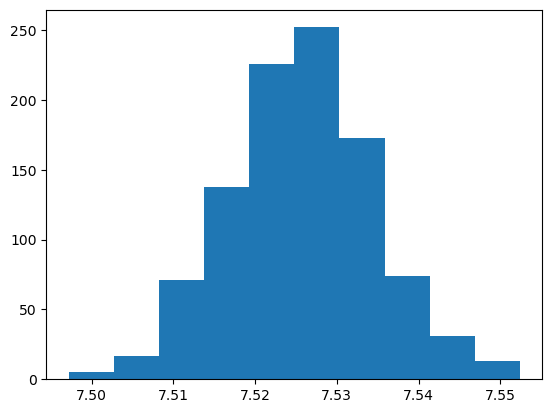

In [62]:
import matplotlib.pyplot as plt

plt.hist(mean_flavors_1000)

In [64]:
coffee_sample = df_coffee[['variety', 'country_of_origin', 'flavor']].\
reset_index().sample(n=500)
coffee_sample

,index,variety,country_of_origin,flavor
903,903,Bourbon,Guatemala,7.33
359,359,None,Ethiopia,7.75
398,398,Caturra,Colombia,7.58
1293,1293,Pacas,Honduras,7.17
897,897,Typica,Taiwan,7.42
...,...,...,...,...
768,768,Other,Mexico,7.50
752,752,Caturra,Colombia,7.42
417,417,Catuai,Costa Rica,7.50
669,669,Caturra,Guatemala,7.33


#The bootstrap of mean coffee flavors: Bootstrap, örneklem büyüklüğünü artırmadan, mevcut veri üzerinden birçok yeniden örnekleme (resampling) yaparak, istatistiksel belirsizliği ve güven aralıklarını tahmin etmek için kullanılan bir yöntemdir. Temelde, mevcut veri kümesinden rastgele örneklem almak ve her örneklem için istatistiksel bir hesaplama yapmak anlamına gelir.

In [67]:
import numpy as np

mean_flavors_5000 = []

for i in range(5000):
    mean_flavors_5000.append(
        np.mean(coffee_sample.sample(frac=1, replace=True)['flavor']))

(array([   4.,   25.,  183.,  661., 1320., 1450.,  895.,  374.,   81.,
           7.]),
 array([7.46104 , 7.472676, 7.484312, 7.495948, 7.507584, 7.51922 ,
        7.530856, 7.542492, 7.554128, 7.565764, 7.5774  ]),
 <BarContainer object of 10 artists>)

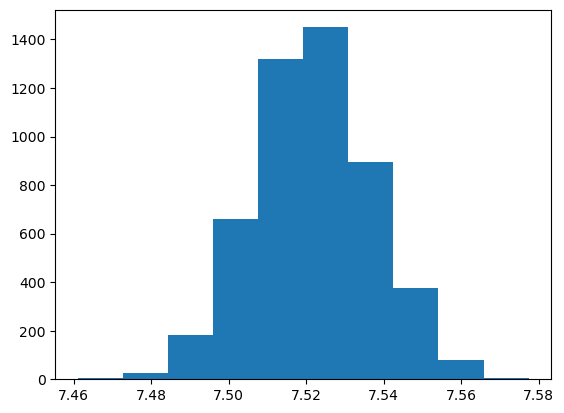

In [68]:
import matplotlib.pyplot as plt

plt.hist(mean_flavors_5000)

In [70]:
coffee_sample['flavor'].mean()

7.5215

In [73]:
np.mean(mean_flavors_5000)

7.521865335999999

In [75]:
df_coffee['flavor'].mean()

7.526046337817639

In [77]:
coffee_sample['flavor'].std()

0.33973812560261185

In [79]:
#bootstrap'in standart sapma
np.std(mean_flavors_5000,ddof=1)

0.015113079402984425

In [81]:
#bootstrap örneklem standart hatası
np.std(mean_flavors_5000, ddof=1) * np.sqrt(500)

0.33793872894425114

(array([   4.,   25.,  183.,  661., 1320., 1450.,  895.,  374.,   81.,
           7.]),
 array([7.46104 , 7.472676, 7.484312, 7.495948, 7.507584, 7.51922 ,
        7.530856, 7.542492, 7.554128, 7.565764, 7.5774  ]),
 <BarContainer object of 10 artists>)

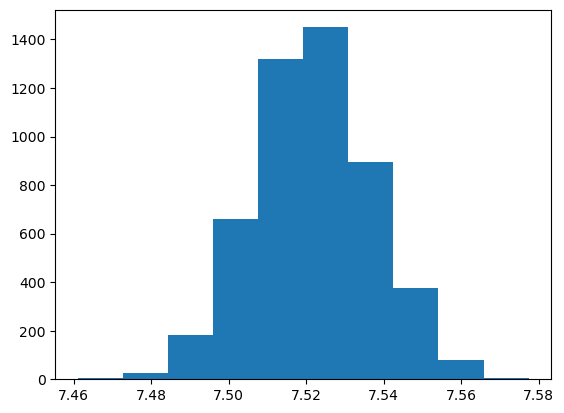

In [85]:
plt.hist(mean_flavors_5000)

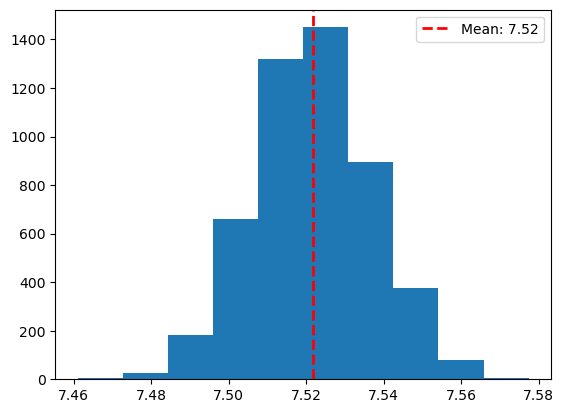

In [87]:
plt.hist(mean_flavors_5000);
plt.axvline(np.mean(mean_flavors_5000), color='red', linestyle='dashed', 
            linewidth=2, label=f'Mean: {np.mean(mean_flavors_5000):.2f}')
plt.legend()

#plt.axvline(): Bu fonksiyon, bir dikey çizgi çizer. Çizgi, histogram üzerinde x eksenine paralel bir çizgi olacak şekilde yerleştirilir.
np.mean(mean_flavors_5000): Bu kısım, mean_flavors_5000 listesinde yer alan 5000 örneklem ortalamasının ortalamasını hesaplar.
color='red': Çizginin rengini kırmızı yapar.
linestyle='dashed': Çizginin tarzını kesikli yapar.
linewidth=2: Çizginin kalınlığını belirler (bu durumda 2 birim).
label=f'Mean: {np.mean(mean_flavors_5000):.2f}': Çizginin yanına, ortalamayı gösteren bir etiket ekler. Bu etiket kırmızı çizgiyi tanımlar ve ortalama değeri (2 ondalıklı) gösterir.

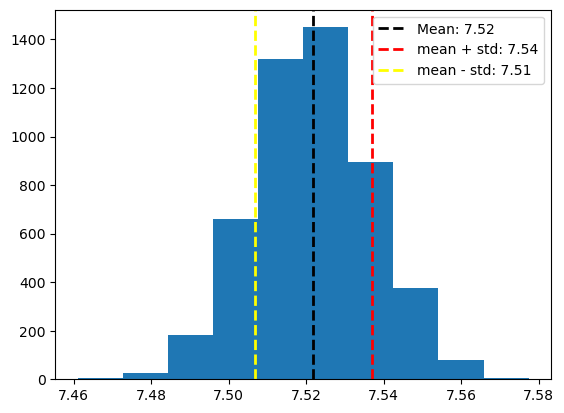

In [90]:
mean = np.mean(mean_flavors_5000)
plus_one_std = mean + np.std(mean_flavors_5000, ddof=1)
minus_one_std = mean - np.std(mean_flavors_5000, ddof=1)

plt.hist(mean_flavors_5000);

plt.axvline(mean, color='black', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')

plt.axvline(plus_one_std, color='red', linestyle='dashed', linewidth=2, label=f'mean + std: {plus_one_std:.2f}')

plt.axvline(minus_one_std, color='yellow', linestyle='dashed', linewidth=2, label=f'mean - std: {minus_one_std:.2f}')

plt.legend()



#plus_one_std: Bu satır, ortalamaya bir standart sapma ekler. Yani, ortalamanın sağındaki 1 standart sapmayı temsil eder.
np.std(mean_flavors_5000, ddof=1): Bu, mean_flavors_5000 listesinde yer alan 5000 örneklem ortalamasının standart sapmasını hesaplar.
minus_one_std: Bu satır, ortalamadan bir standart sapma çıkarır. Yani, ortalamanın solundaki 1 standart sapmayı temsil eder.

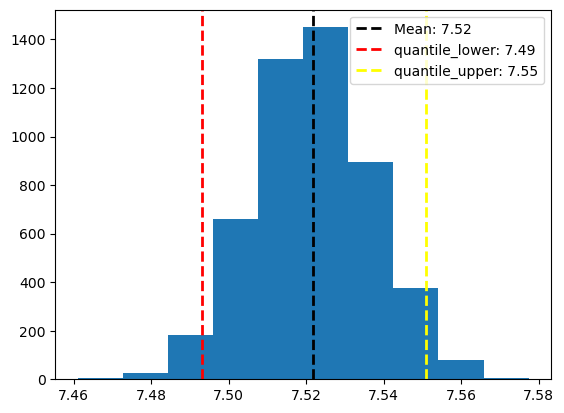

In [93]:
quantile_lower = np.quantile(mean_flavors_5000, 0.025)
quantile_upper = np.quantile(mean_flavors_5000, 0.975)

plt.hist(mean_flavors_5000);

plt.axvline(mean, color='black', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')

plt.axvline(quantile_lower, color='red', linestyle='dashed', linewidth=2, label=f'quantile_lower: {quantile_lower:.2f}')

plt.axvline(quantile_upper, color='yellow', linestyle='dashed', linewidth=2, label=f'quantile_upper: {quantile_upper:.2f}')

plt.legend()

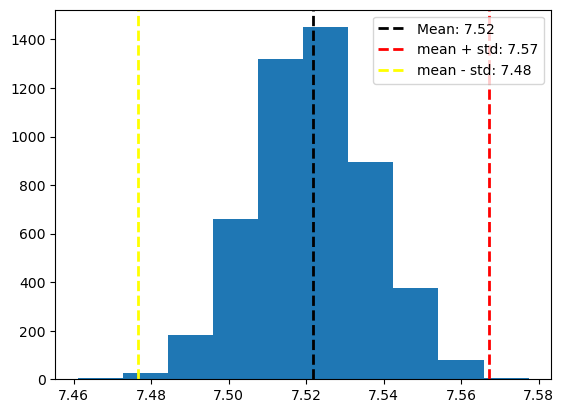

In [95]:
mean = np.mean(mean_flavors_5000)
plus_one_std = mean + 3 * np.std(mean_flavors_5000, ddof=1)
minus_one_std = mean - 3 * np.std(mean_flavors_5000, ddof=1)

plt.hist(mean_flavors_5000);

plt.axvline(mean, color='black', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')

plt.axvline(plus_one_std, color='red', linestyle='dashed', linewidth=2, label=f'mean + std: {plus_one_std:.2f}')

plt.axvline(minus_one_std, color='yellow', linestyle='dashed', linewidth=2, label=f'mean - std: {minus_one_std:.2f}')

plt.legend()

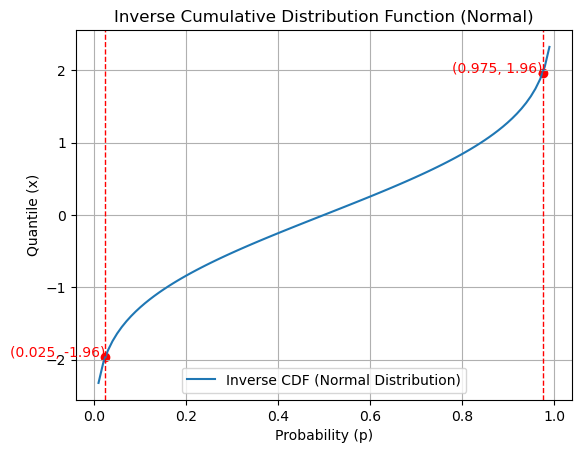

In [97]:
from scipy.stats import norm

p_values = np.linspace(0, 1, 100)

quantiles = norm.ppf(p_values, loc=0, scale=1) #verilen olasılık değerlerine karşılık gelen kuantil (quantile) değerlerini hesaplar. Burada loc=0 ve scale=1 parametreleri, standart normal dağılım (ortalama 0, standart sapma 1) kullanılarak hesaplama yapılmasını sağlar.quantiles listesi, her bir olasılık değeri için karşılık gelen normal dağılımdaki kuantil değerlerini tutar.

plt.plot(p_values, quantiles, label="Inverse CDF (Normal Distribution)")

p1, p2 = 0.025, 0.975
quantile_025 = norm.ppf(p1)
quantile_975 = norm.ppf(p2)

plt.scatter([p1, p2], [quantile_025, quantile_975], color='red')  # Noktaları çiz
plt.axvline(p1, color='red', linestyle='dashed', linewidth=1)  # p1 için dikey çizgi
plt.axvline(p2, color='red', linestyle='dashed', linewidth=1)  # p2 için dikey çizgi

# X ve Y değerlerini grafikte gösterelim
plt.text(p1, quantile_025, f'({p1:.3f}, {quantile_025:.2f})', color='red', fontsize=10, ha='right')
plt.text(p2, quantile_975, f'({p2:.3f}, {quantile_975:.2f})', color='red', fontsize=10, ha='right')



plt.xlabel("Probability (p)")
plt.ylabel("Quantile (x)")
plt.title("Inverse Cumulative Distribution Function (Normal)")
plt.grid(True)
plt.legend()
plt.show()




Normal Dağılımın Ters Kümülatif Dağılım Fonksiyonu (Inverse CDF):

Grafikteki eğri, verilen bir olasılık değeri için normal dağılımdan elde edilen değerin nasıl değiştiğini gösterir. Bu, normal dağılımın kümülatif dağılım fonksiyonunun tersidir.
Örneğin, belirli bir olasılık değeri (p = 0.025 veya p = 0.975) verildiğinde, bu olasılığa karşılık gelen x değeri (kuantil) hesaplanır. Bu, normal dağılımın alt ve üst uçlarını (yani, güven aralığının sınırlarını) gösterir.
%95 Güven Aralığı:

p1 = 0.025 ve p2 = 0.975 noktaları %95 güven aralığının alt ve üst sınırlarını temsil eder. Bu değerler, %95 olasılıkla, normal dağılımdan alınan verilerin bu aralık içinde yer alacağını belirtir.
Kırmızı çizgiler ve kırmızı noktalar, %95 güven aralığının sınırlarını işaret eder. Bu, örneklemlerden elde edilen istatistiklerin bu aralık içinde yer almasının olasılığını gösterir.
Grafiğin Ne Gösterdiği ve Neyi Kanıtladığı:
Olasılık ve Değer Arasındaki İlişkiyi Gösterir: Grafik, belirli olasılık değerlerinin normal dağılımdaki karşılık gelen kuantil değerlerine nasıl dönüştüğünü gösterir. Yani, belirli bir olasılık için, bu olasılığa denk gelen normal dağılımdaki değeri (x değeri) hesaplar.
Güven Aralığının Görselleştirilmesi: %95 güven aralığını ve kuantilleri göstererek, örneklemden elde edilen verilerin popülasyon parametrelerine ne kadar yakın olduğunu anlamamıza yardımcı olur. %95'lik bir güvenle, verilerin bu aralık içinde yer alacağını öngörebiliriz.

In [100]:
df_stck = pd.read_feather("data/stack_overflow.feather")
df_stck

,respondent,main_branch,hobbyist,age,age_1st_code,age_first_code_cut,comp_freq,comp_total,converted_comp,country,...,survey_length,trans,undergrad_major,webframe_desire_next_year,webframe_worked_with,welcome_change,work_week_hrs,years_code,years_code_pro,age_cat
0,36.0,"I am not primarily a developer, but I write co...",Yes,34.0,30.0,adult,Yearly,60000.0,77556.0,United Kingdom,...,Appropriate in length,No,"Computer science, computer engineering, or sof...",Express;React.js,Express;React.js,Just as welcome now as I felt last year,40.0,4.0,3.0,At least 30
1,47.0,I am a developer by profession,Yes,53.0,10.0,child,Yearly,58000.0,74970.0,United Kingdom,...,Appropriate in length,No,"A natural science (such as biology, chemistry,...",Flask;Spring,Flask;Spring,Just as welcome now as I felt last year,40.0,43.0,28.0,At least 30
2,69.0,I am a developer by profession,Yes,25.0,12.0,child,Yearly,550000.0,594539.0,France,...,Too short,No,"Computer science, computer engineering, or sof...",Django;Flask,Django;Flask,Just as welcome now as I felt last year,40.0,13.0,3.0,Under 30
3,125.0,"I am not primarily a developer, but I write co...",Yes,41.0,30.0,adult,Monthly,200000.0,2000000.0,United States,...,Appropriate in length,No,None,None,None,Just as welcome now as I felt last year,40.0,11.0,11.0,At least 30
4,147.0,"I am not primarily a developer, but I write co...",No,28.0,15.0,adult,Yearly,50000.0,37816.0,Canada,...,Appropriate in length,No,"Another engineering discipline (such as civil,...",None,Express;Flask,Just as welcome now as I felt last year,40.0,5.0,3.0,Under 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2256,62812.0,I am a developer by profession,Yes,40.0,10.0,child,Yearly,145000.0,145000.0,United States,...,Too long,No,"Computer science, computer engineering, or sof...",Flask;jQuery,Angular;Angular.js;Flask;jQuery;React.js,Somewhat less welcome now than last year,50.0,30.0,20.0,At least 30
2257,62835.0,I am a developer by profession,Yes,23.0,9.0,child,Monthly,180000.0,33972.0,Russian Federation,...,Too short,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET Core;Flask,Just as welcome now as I felt last year,60.0,8.0,3.0,Under 30
2258,62837.0,I am a developer by profession,Yes,27.0,8.0,child,Monthly,7500.0,97284.0,Germany,...,Appropriate in length,No,Mathematics or statistics,None,None,Just as welcome now as I felt last year,42.0,12.0,2.0,Under 30
2259,62867.0,"I am not primarily a developer, but I write co...",Yes,33.0,13.0,child,Monthly,6000.0,72000.0,Panama,...,Too long,No,"Another engineering discipline (such as civil,...",None,Django;React.js,A lot less welcome now than last year,45.0,15.0,2.0,At least 30


In [104]:
from scipy.stats import norm

lower = norm.ppf(0.025) #bu satır %2.5 olasılığına karşılık gelen değeri, yani güven aralığının alt sınırını hesaplar.
upper = norm.ppf(0.975) #güven aralığının üst sınırını verir

print(lower,upper)


-1.9599639845400545 1.959963984540054


In [51]:
mean_comp_samp = df_stck['converted_comp'].mean()
mean_comp_samp

119574.71738168952

In [102]:
import numpy as np

so_boot_distn = []

for i in range(5000):
    so_boot_distn.append(
        np.mean(
            df_stck.sample(frac=1, replace=True)['converted_comp']))

(array([  1.,   0.,   1.,   0.,   0.,   5.,   3.,   8.,   6.,  13.,   8.,
         26.,  26.,  49.,  83.,  96., 124., 144., 181., 215., 225., 260.,
        274., 277., 289., 294., 291., 275., 290., 290., 229., 222., 162.,
        126., 126.,  85.,  81.,  55.,  44.,  34.,  25.,  18.,   9.,  14.,
          7.,   6.,   1.,   1.,   0.,   1.]),
 array([ 97548.26448474,  98404.93944272,  99261.61440071, 100118.28935869,
        100974.96431667, 101831.63927466, 102688.31423264, 103544.98919062,
        104401.66414861, 105258.33910659, 106115.01406457, 106971.68902256,
        107828.36398054, 108685.03893852, 109541.71389651, 110398.38885449,
        111255.06381247, 112111.73877046, 112968.41372844, 113825.08868642,
        114681.76364441, 115538.43860239, 116395.11356037, 117251.78851835,
        118108.46347634, 118965.13843432, 119821.8133923 , 120678.48835029,
        121535.16330827, 122391.83826625, 123248.51322424, 124105.18818222,
        124961.8631402 , 125818.53809819, 126675.2

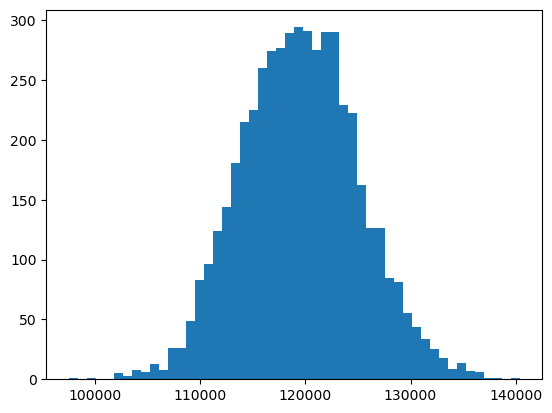

In [103]:
import matplotlib.pyplot as plt

plt.hist(so_boot_distn,bins=50)

In [104]:
std_error = np.std(so_boot_distn, ddof=1)
std_error
#Bu satırda hesaplanan standart hata, so_boot_distn içindeki örneklem ortalamalarının dağılımının yayılmasını ölçer. Başka bir deyişle, bu değer, bootstrap dağılımının ne kadar yayılmış olduğunu gösterir.
Standart hata, genellikle bir parametrenin tahmininin güvenilirliğini değerlendirmek için kullanılır. Bootstrap yöntemi ile hesaplanan standart hata, veri kümesinin ortalama değeri hakkında ne kadar belirsizlik olduğunu gösterir.

5575.344959960513

In [105]:
mean_comp_hyp = 110000

In [106]:
z_score = (mean_comp_samp - mean_comp_hyp) / std_error
z_score

1.7173318333575067

## Z-skoru,
bir örneklem ortalamasının (veya herhangi bir değerin) normal dağılımdaki beklenen değere (hipotez değeri) ne kadar uzak olduğunu ölçen bir standartlaştırılmış değerdir. 
 Bu formülde, örneklem ortalaması ile beklenen değer arasındaki fark, standart hata ile bölünür. Bu, örneklem ortalamasının, beklenen (hipotez) değere ne kadar uzak olduğunu standart hata cinsinden gösterir.

# Z-skoru genellikle şunu gösterir:

Eğer z-skoru büyükse, örneklem ortalaması beklenen değerden oldukça uzak demektir.
Eğer z-skoru küçükse, örneklem ortalaması beklenen değere çok yakın demektir.
Z-skoru > 2 genellikle anlamlı bir farkı gösterir (özellikle %95 güven aralığında).

Z-skoru < -2 de aynı şekilde anlamlı bir farkı gösterir.

Eğer z-skoru 0'a yakınsa, bu, örneklem ortalamasının beklenen değere yakın olduğunu gösterir.

## Z-Skorunun Yorumlanması:
Z-skoru 0'dan büyük olduğunda, örneklem ortalaması beklenen değerden pozitif yönde uzaklaşmış demektir.
Bu durumda z-skoru 1.7173 olduğu için, örneklem ortalaması beklenen değerden 1.7173 standart hata uzaklıkta demektir.
Bu değeri %95 güven aralığı ile değerlendirdiğimizde, z-skorunun genellikle -1.96 ile +1.96 arasında olması gerektiği kabul edilir. Yani, 1.7173, bu aralığa yakın bir değerdir, ancak bu durumda hipotez testi yapılırsa, hipotezi reddetmek için yeterli bir fark oluşmaz. Bu durumda hipotez reddedilmez çünkü fark çok büyük değil.

Sonuç:
Bu z-skoru, beklenen değerden çok büyük bir sapma olmadığını ve örneklem ortalamasının beklenen değere yakın olduğunu gösterir.
Genelde, z-skoru 2'nin üzerinde olduğunda, örneklem ortalaması ve beklenen değer arasında önemli bir fark olduğu kabul edilir, ancak burada fark o kadar büyük değil.
Bu durumda z-skorunun bu değeri gösterdiği, örneklemin beklenen değere yakın olduğunu ve hipotezin reddedilmeyeceğini düşündürmektedir.

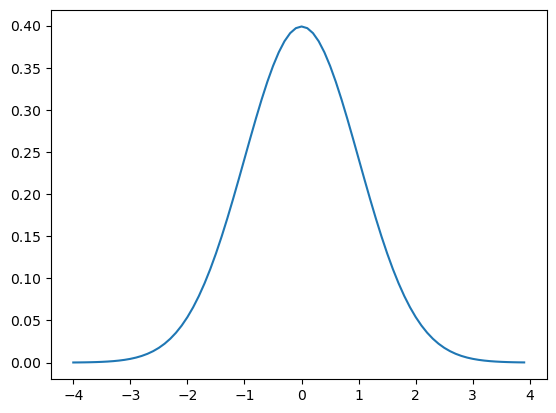

In [107]:
#z ortalaması 0 sapması 1 olan bir dağılımdır
from scipy.stats import norm
z_data = np.arange(-4, 4, 0.1)
plt.plot(z_data, norm.pdf(z_data, loc = 0, scale = 1))

plt.plot(z_data, norm.pdf(z_data, loc = 0, scale = 1)):

norm.pdf() fonksiyonu, verilen z_data değerleri için standart normal dağılımın olasılık yoğunluk fonksiyonunu hesaplar. loc=0 ve scale=1 parametreleri, standart normal dağılımın ortalamasının 0 ve standart sapmasının 1 olduğunu belirtir.
plt.plot() fonksiyonu, z_data (x ekseni) ve norm.pdf() (y ekseni) kullanarak bir çizgi grafiği oluşturur.

Bu grafik, standart normal dağılımı görselleştirir. Grafikte x ekseni z-değerlerini (standart normal dağılımdaki herhangi bir değeri) temsil ederken, y ekseni bu z-değerlerinin olasılık yoğunluklarını (PDF) temsil eder.

Grafik, z-değeri 0'da maksimum olur ve her iki tarafta simetrik olarak azalır.
Bu, standart normal dağılımın tipik çan eğrisini gösterir.







In [108]:
#z skoru hesaplanırken p değerleri 0 hipotezi için desteğin gücünü öölçer. 
first_code_boot_distn = []
for i in range(5000):
    first_code_boot_distn.append(
        np.mean(
            (df_stck.sample(frac=1, replace=True)
             ['age_first_code_cut'] == 'child').mean()
        )
    )
    #Kodda, z-skoru hesaplanırken p-değerleri 0 hipotezi (null hypothesis) için desteğin gücünü ölçer.
Bootstrap dağılımı ile elde edilen 'child' oranları üzerinden, hipotez testi yapılabilir ve z-skoru kullanılarak örneklem oranının beklenen değerden ne kadar uzak olduğu hesaplanabilir.


In [117]:
prop_child_samp = (df_stck['age_first_code_cut'] == 'child').mean()
prop_child_samp

0.39141972578505085

In [119]:
prop_child_hyp = 0.35

In [121]:
std_err = np.std(first_code_boot_distn, ddof=1)
std_err 

0.010287467713481485

In [123]:
z_score = (prop_child_samp - prop_child_hyp) / std_err
z_score #ort 0 std 1 z dağılımı denir

4.02623142435444

In [ ]:
prop_child_samp: 'child' olan değerlerin örneklemdeki oranı.
prop_child_hyp: Hipotez edilen oran (beklenen oran, burada %35).
std_err: Standart hata, bootstrap örneklem dağılımındaki oranların yayılmasını ölçer.
z_score: Z-skoru, örneklem oranının hipotez oranından ne kadar uzak olduğunu standart hata cinsinden ölçer. Buradaki z-skoru değeri 4.026 oldukça büyük olduğu için istatiksel olarak anlamlı bir fark olduğunu gösterir.

In [127]:
#sağ kuyruk testi olsuğu için 1 den çıkarılır
from scipy.stats import norm

1- norm.cdf(z_score, loc=0, scale=1) #h0 reddedilir küçük çıkıyor!

2.8338954363160695e-05

In [ ]:
Z-skoru 4.026 olduğu için, p-değeri genellikle çok küçük olacaktır (çok düşük bir olasılık). Bu, hipotez testinde null hipotezini reddetmek anlamına gelir.

Özet:
norm.cdf(z_score): Z-skorunun solundaki alanı hesaplar (olasılık).
1 - norm.cdf(z_score): Z-skorunun sağındaki alanı hesaplar (p-değeri).
Sağ kuyruk testi için kullanılır; p-değeri küçükse mesela 0.05ten, null hipotezi reddedilir.

In [129]:
from scipy.stats import norm

alpha = 0.05  # Anlamlılık seviyesi (genellikle %5)
prop_child_samp = (df_stck['age_first_code_cut'] == 'child').mean()  # Örneklemdeki 'child' oranı
prop_child_hyp = 0.35  # Hipotez edilen çocuk oranı (null hipotezi)

std_err = np.std(first_code_boot_distn, ddof=1)  # Standart hata (bootstrap dağılımından)
z_score = (prop_child_samp - prop_child_hyp) / std_err  # Z-skoru hesaplama

p_value = 1 - norm.cdf(z_score, loc=0, scale=1)  # Sağ kuyruk testi ile p-değeri hesaplama
p_value  # p-değerini yazdırma


2.8338954363160695e-05

Bu satırda, anlamlılık seviyesi (genellikle %5) belirlenmiştir. Bu, p-değerinin 0.05'ten küçük olup olmadığını test edeceğimiz sınırdır. Eğer p-değeri 0.05'ten küçükse, null hipotezi reddedilir.
prop_child_samp = (df_stck['age_first_code_cut'] == 'child').mean():

Bu satır, df_stck veri çerçevesindeki 'age_first_code_cut' sütununda 'child' olan oranı hesaplar.
df_stck['age_first_code_cut'] == 'child' ifadesi, 'child' olan her değeri True yapar, diğerlerini False yapar.
.mean() bu True/False değerlerinin ortalamasını alır ve 'child' oranını verir. Sonuç prop_child_samp olarak saklanır.
prop_child_hyp = 0.35:

Bu satırda, hipotez edilen oran yani null hipotezi oranı belirlenir. Burada 0.35 (yani %35) çocuk oranı hipotez olarak kabul edilmiştir.
std_err = np.std(first_code_boot_distn, ddof=1):

Bu satırda, standart hata hesaplanır. first_code_boot_distn bootstrap örneklem dağılımındaki çocuk oranlarının dağılımını tutar.
np.std(..., ddof=1) fonksiyonu, bu dağılımdaki örneklemdeki standart sapmayı Bessel düzeltmesi ile hesaplar. Bu, daha güvenilir bir standart hata tahmini sağlar.
z_score = (prop_child_samp - prop_child_hyp) / std_err:

Bu satırda z-skoru hesaplanır. Z-skoru, örneklem oranı ile hipotez oranı arasındaki farkı standart hata ile böler.
Z-skoru, örneklem oranının hipotez oranından ne kadar uzaklaştığını ve bu farkın standart hata cinsinden ne kadar büyük olduğunu gösterir.
p_value = 1 - norm.cdf(z_score, loc=0, scale=1):

norm.cdf(z_score): Bu fonksiyon, z-skorunun solundaki alanı (olasılığı) hesaplar. Yani, z-skoru kadar olan toplam olasılığı hesaplar.
1 - norm.cdf(z_score): Sağ kuyruk testi yapıldığı için, z-skorunun sağındaki alanı (p-değeri) hesaplamak için 1 - CDF yapılır. Bu, p-değerini verir.
Eğer z-skoru pozitifse, sağdaki alan daha küçük olur ve bu, hipotez testinin anlamlılık seviyesini belirler.
p_value:

Bu, p-değerini yazdırır. Eğer p-değeri 0.05'ten küçükse, null hipotezi reddedilir ve örneklem oranının hipotez oranından istatistiksel olarak anlamlı bir farkı olduğu kabul edilir.
Örnek:
Diyelim ki prop_child_samp = 0.3914 (örneklemdeki 'child' oranı) ve prop_child_hyp = 0.35 (beklenen oran).

Z-skoru hesaplanır ve sonra sağ kuyruk testi yapılır.
p-değeri hesaplanır. Eğer p-değeri 0.05'ten küçükse, null hipotezi reddedilir.
Özet:
Bu kod, proportion test kullanarak bootstrap örneklem oranı ile hipotez edilen oranı karşılaştırır ve sağ kuyruk testi ile p-değeri hesaplar. P-değeri, örneklem oranının hipotez oranından ne kadar uzak olduğunu ve bunun istatistiksel olarak anlamlı olup olmadığını belirler.

In [131]:
p_value <= alpha 

True

In [141]:
#güven aralıkları kantiller kullanılrak yapılabilir
from scipy.stats import norm

lower = np.quantile(first_code_boot_distn, 0.025)
upper = np.quantile(first_code_boot_distn, 0.975)

(lower,upper)
#Güven Aralığının Yorumlanması:
%95 güven aralığı genellikle %2.5 ve %97.5 kantilleri arasında yer alır. Yani, güven aralığı, bu kantiller arasında bulunan değerlerin %95'inin doğru parametreyi (örneğin, popülasyon oranını) kapsadığı varsayılır.
Örneğin, eğer lower = 0.30 ve upper = 0.40 ise, bu, popülasyon oranının %95 güvenle %30 ile %40 arasında olduğu anlamına gelir.
#Bu kod, bootstrap örneklem dağılımından %2.5 ve %97.5 kantillerini kullanarak, %95 güven aralığını hesaplar. Bu, verinizin güven aralığını anlamak için yaygın bir yöntemdir ve verinin merkezi eğilim ve belirsizliğini gösterir.


(0.3715170278637771, 0.4117647058823529)

In [143]:
#iki örneklemli problemler. t istatiği:
df_stck.groupby('age_first_code_cut')['converted_comp'].mean()

#Bu kod, iki grup arasındaki farkı (örneğin, 'adult' ve 'child' grupları arasında) istatistiksel olarak test etmek için kullanılır.
#Hesaplanan t-istatistiği, iki grup arasındaki farkın anlamlı olup olmadığını test eder.

#T-istatistiği çok büyükse, gruplar arasında istatistiksel olarak anlamlı bir fark olduğu kabul edilir.
#Bu test, özellikle iki bağımsız grubun ortalamalarını karşılaştırmak için kullanılır.


age_first_code_cut
adult    111313.311047
child    132419.570621
Name: converted_comp, dtype: float64

### t-İstatistiği ve Hesaplama

**t-İstatistiği**, iki örneklem arasındaki ortalama farkının anlamlı olup olmadığını test etmek için kullanılan bir istatistiksel testtir. Bu test, iki grup arasındaki farkın örneklem varyansı ile karşılaştırılmasını sağlar. Özellikle **iki bağımsız grup** için, örneklem büyüklükleri ve standart sapmaları göz önünde bulundurularak hesaplanır.

#### **Formül:**

İki bağımsız örneklem için t-istatistiği şu formülle hesaplanır:

$$
t = \frac{\bar{x}_1 - \bar{x}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}
$$

- **$\bar{x}_1$** ve **$\bar{x}_2$**: İlk ve ikinci örneklemin ortalamaları  
- **$s_1$** ve **$s_2$**: İlk ve ikinci örneklemin standart sapmaları  
- **$n_1$** ve **$n_2$**: İlk ve ikinci örneklemin büyüklükleri  

#### **Hesaplama Aşamaları:**

1. **Örneklem Ortalamaları:**
   - `adult` grubu: 111313.311047  
   - `child` grubu: 132419.570621  

2. **Standart Sapmalar:**
   - `adult` grubu: 271546.521729  
   - `child` grubu: 255585.240115  

3. **Örneklem Büyüklükleri:**
   - `adult` grubu: 1376  
   - `child` grubu: 885  

4. **t-İstatistiği Hesaplama:**
   - Formülde belirtilen verilerle t-istatistiği hesaplanır.

#### **t-İstatistiği Sonucu:**

Sonuç şu şekilde hesaplanmıştır:

$$
t = 1.8699313316221844
$$

#### **Sonuç Yorumlanması:**

- Hesaplanan t-değeri **1.87**'dir.
- Bu değeri anlamlılık seviyeleriyle karşılaştırarak gruplar arasındaki farkın anlamlı olup olmadığını test edebiliriz.
  - Eğer **t-değeri** kritik değerden (örneğin, 1.96) küçükse, null hipotezi reddedemeyiz ve iki grup arasındaki fark anlamlı değildir.
  - Eğer **t-değeri** büyükse, null hipotezini reddederiz ve iki grup arasında anlamlı bir fark olduğunu kabul ederiz.
  
Bu durumda, **1.87**'lik t-değeri **1.96’dan küçük** olduğu için, bu iki grup arasındaki farkın istatistiksel olarak anlamlı olmadığı sonucuna varılır.


Hayır, kritik değer ve anlamlılık düzeyi birbirinden farklı ama birbiriyle ilişkili kavramlardır:

Anlamlılık düzeyi (
𝛼
α): İstatistiksel testte kabul edilebilir maksimum hata (yanlış pozitif) olasılığını gösterir. En yaygın kullanılan değerler, 
𝛼
=
0.05
α=0.05, 
𝛼
=
0.01
α=0.01 veya 
𝛼
=
0.001
α=0.001 gibi düzeylerdir.

Kritik değer: Seçilen anlamlılık düzeyine ve testin tipine (tek yönlü veya çift yönlü test) göre, istatistiksel dağılımdan (t-dağılımı, Z-dağılımı vb.) elde edilen bir eşik değeridir. Bu değerin ötesinde kalan test istatistiği değerleri, “istatistiksel olarak anlamlı” sonuçları gösterir.

Dolayısıyla, kritik değer hesaplanırken veya tablolarından okunurken, anlamlılık düzeyi (
𝛼
α) ve serbestlik derecesi (degrees of freedom) birlikte kullanılır.


In [145]:
#formülü kullanıyoruz:
xbar = df_stck.groupby('age_first_code_cut')['converted_comp'].mean()
xbar

age_first_code_cut
adult    111313.311047
child    132419.570621
Name: converted_comp, dtype: float64

In [147]:
s = df_stck.groupby('age_first_code_cut')['converted_comp'].std()
s

age_first_code_cut
adult    271546.521729
child    255585.240115
Name: converted_comp, dtype: float64

In [149]:
n = df_stck.groupby('age_first_code_cut')['converted_comp'].count()
n

age_first_code_cut
adult    1376
child     885
Name: converted_comp, dtype: int64

In [151]:
# 
df_stck.groupby('age_first_code_cut')['converted_comp'].agg(['mean', 'std', 'count']) #biri seri bir df veriyor. bu df verir!

,mean,std,count
age_first_code_cut,,,
adult,111313.311047,271546.521729,1376
child,132419.570621,255585.240115,885


In [153]:
import numpy as np
pay = xbar.iloc[1] - xbar.iloc[0]
payda = np.sqrt(s.iloc[1]**2 / n.iloc[1] + s.iloc[0]**2 / n.iloc[0])
t_stat = pay /payda
t_stat

1.8699313316221844

Text(0, 0.5, 'PDF(x)')

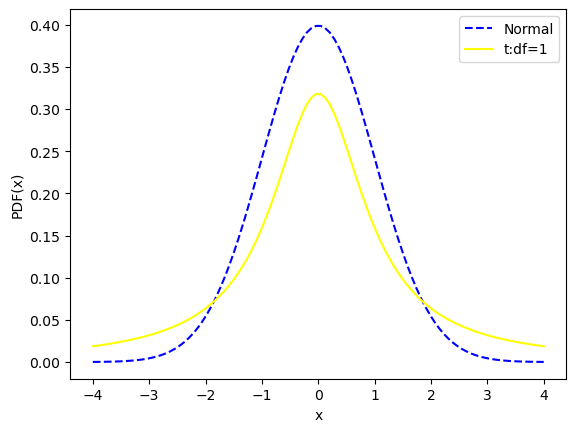

In [155]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

x = np.linspace(-4, 4, 100)  # -4 ile 4 arasında 100 eşit aralıklı değerler oluşturuyoruz.
plt.plot(x, stats.norm.pdf(x), label='Normal', linestyle='--', color='blue')  # Normal dağılımın PDF'ini çiziyoruz.
plt.plot(x, stats.t.pdf(x, 1), label='t:df=1', color='yellow')  # t dağılımının PDF'ini çiziyoruz, df=1.
plt.legend()  # Grafik için açıklama ekliyoruz.
plt.xlabel('x')  # x eksenini etiketliyoruz.
plt.ylabel('PDF(x)')  # y eksenini etiketliyoruz.
#Kod, normal dağılım ve t dağılımının grafiklerini çiziyor.
Normal dağılım sabit bir şekle sahiptir ve t dağılımı, serbestlik derecesine bağlı olarak farklılık gösterir.
df=1 ile çizilen t dağılımı, normal dağılımdan daha geniş ve daha kısa kuyruklara sahiptir.
Serbestlik derecesi arttıkça, t dağılımı normal dağılıma yaklaşır.
Grafiğin Yorumlanması:
t dağılımı, küçük serbestlik dereceleri (örneğin df=1) ile daha geniş kuyruklara sahipken, serbestlik derecesi arttıkça (örneğin df=30 veya df=100) normal dağılıma yaklaşır.
Bu, normal dağılımın bir limit hali olarak t dağılımının daha küçük serbestlik derecelerinde farklılıklar gösterdiğini ve büyük serbestlik derecelerinde normal dağılıma yakınsadığını gösterir.
Özet:
Bu kod, normal dağılım ve t dağılımını karşılaştıran bir grafik çizer. t dağılımı, serbestlik derecesi küçük olduğunda normal dağılımdan daha geniş kuyruklara sahiptir ve serbestlik derecesi arttıkça normal dağılıma yaklaşır.


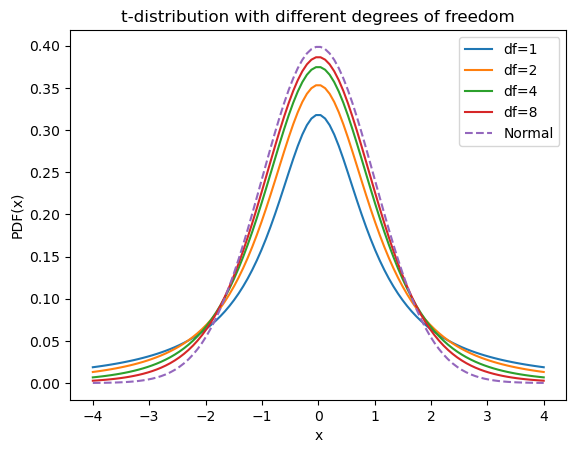

In [159]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

x = np.linspace(-4, 4, 100)  # -4 ile 4 arasında 100 eşit aralıklı değerler oluşturuyoruz.

# Farklı serbestlik dereceleri için t dağılımını çiziyoruz
for df in [1, 2, 4, 8]:
    plt.plot(x, stats.t.pdf(x, df), label=f'df={df}')

# Normal dağılımı çiziyoruz
plt.plot(x, stats.norm.pdf(x), label='Normal', linestyle='--')

plt.legend()  # Grafik için açıklama ekliyoruz.
plt.title('t-distribution with different degrees of freedom')  # Başlık ekliyoruz.
plt.xlabel('x')  # x eksenini etiketliyoruz.
plt.ylabel('PDF(x)')  # y eksenini etiketliyoruz.
plt.show()  # Grafiği gösteriyoruz.



# t dağılımı ve normal dağılım grafikleri karşılaştırıldığında:
Serbestlik derecesi düşük olduğunda (df=1, 2), t dağılımı daha geniş kuyruklara sahip olur. Yani, daha fazla ağırlık uç değerlerde bulunur.
Serbestlik derecesi arttıkça (df=4, 8), t dağılımı normal dağılıma daha çok benzer hale gelir.
Normal dağılım, serbestlik derecesi yüksek olan t dağılımına yaklaşır.

In [161]:
degrees_of_freedom = n.iloc[0] + n.iloc[1] - 2
degrees_of_freedom
#n.iloc[0] = 1376 (adult grubu için),
#n.iloc[1] = 885 (child grubu için),

2259

In [163]:
from scipy.stats import t #reddedilir!
1 - t.cdf(t_stat, df=degrees_of_freedom)

#Bu kod, sağ kuyruk testi kullanarak p-değerini hesaplar. t.cdf() fonksiyonu ile t-istatistiği için solundaki alan hesaplanır ve 1 - CDF ile sağdaki alan (p-değeri) bulunur. p-değeri, hipotez testinde null hipotezinin reddedilip reddedilmeyeceğini belirler. Eğer p-değeri 0.05'ten küçükse, null hipotezini reddederiz.

0.030811302165157595

### Kod Parçasının Açıklaması

1. **`n = df_stck.groupby('age_first_code_cut')['converted_comp'].count()`**  
   - `df_stck` isimli DataFrame’de, `'age_first_code_cut'` değişkenine göre gruplama yaparak, her gruptaki (`adult`, `child`) gözlem sayısını (`count()`) bulur. Bu sonuç **n** değişkenine atanır.  
   - Örneğin:  
     - `n.iloc[0] = 1376` → `adult` grubundaki gözlem sayısı  
     - `n.iloc[1] = 885` → `child` grubundaki gözlem sayısı  

2. **`degrees_of_freedom = n.iloc[0] + n.iloc[1] - 2`**  
   - İki bağımsız örneklem için kullanılan, klasik t-testindeki **serbestlik derecesi** (degrees of freedom) yaklaşık olarak şu formülle hesaplanır:  
     $$
     df = n_1 + n_2 - 2
     $$  
   - Bu örnekte, $1376 + 885 - 2 = 2259$ olarak bulunur.

3. **`from scipy.stats import t`**  
   - `scipy.stats` kütüphanesinden `t` (Student’s t dağılımı) import edilir. Bu kütüphane, t dağılımına dair olasılık hesaplamalarını yapabilmemizi sağlar.

4. **`1 - t.cdf(t_stat, df=degrees_of_freedom)`**  
   - `t.cdf(x, df)` fonksiyonu, t-dağılımının belirli bir **df** (serbestlik derecesi) için, **x** değerinin solunda kalan alanı (kümülatif olasılığı) döndürür.
   - `t_stat`, önceki adımlarda hesaplanmış olan **t-istatistiğidir**.
   - **`1 - t.cdf(t_stat, df=degrees_of_freedom)`** ifadesi ise **t_stat** değerinin sağında kalan alanı verir:  
     $$
     p\text{-değeri} = P(T > t_\text{stat})
     $$
   - Bu, **sağ kuyruk testi** (right-tailed test) için **p-değerini** ifade eder.

5. **p-Değerine Göre Karar Verme**  
   - Eğer bulunan p-değer, önceden belirlenen anlamlılık düzeyinden (genellikle 0.05) küçükse, **null hipotezi reddedilir** ve sonuç istatistiksel olarak anlamlı bulunur.  
   - Eğer p-değer 0.05’ten büyükse, null hipotezini reddetmek için yeterli kanıt olmadığı sonucuna varılır.

**Kısaca:**  
Bu kod parçası, hesaplanmış olan **t_stat** değeri için sağ taraftaki olasılığı (p-değerini) t-dağılımı üzerinden elde eder. Sonrasında, p-değeri 0.05 gibi bir anlamlılık düzeyiyle karşılaştırılarak, hipotezin reddedilip reddedilmeyeceğine karar verilir.


In [165]:
import pandas as pd

df_election = pd.read_feather('data/repub_votes_potus_08_12.feather')

df_election

,state,county,repub_percent_08,repub_percent_12
0,Alabama,Hale,38.957877,37.139882
1,Arkansas,Nevada,56.726272,58.983452
2,California,Lake,38.896719,39.331367
3,California,Ventura,42.923190,45.250693
4,Colorado,Lincoln,74.522569,73.764757
...,...,...,...,...
95,Wisconsin,Burnett,48.342541,52.437478
96,Wisconsin,La Crosse,37.490904,40.577038
97,Wisconsin,Lafayette,38.104967,41.675050
98,Wyoming,Weston,76.684241,83.983328


In [167]:
sample_data = df_election.copy()
sample_data['diff'] = sample_data['repub_percent_08'] - sample_data['repub_percent_12']
sample_data

,state,county,repub_percent_08,repub_percent_12,diff
0,Alabama,Hale,38.957877,37.139882,1.817995
1,Arkansas,Nevada,56.726272,58.983452,-2.257179
2,California,Lake,38.896719,39.331367,-0.434648
3,California,Ventura,42.923190,45.250693,-2.327503
4,Colorado,Lincoln,74.522569,73.764757,0.757812
...,...,...,...,...,...
95,Wisconsin,Burnett,48.342541,52.437478,-4.094937
96,Wisconsin,La Crosse,37.490904,40.577038,-3.086134
97,Wisconsin,Lafayette,38.104967,41.675050,-3.570083
98,Wyoming,Weston,76.684241,83.983328,-7.299087


(array([ 1.,  1.,  3., 12., 29., 28., 21.,  4.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-16.73039829, -14.08019672, -11.42999514,  -8.77979356,
         -6.12959198,  -3.4793904 ,  -0.82918882,   1.82101276,
          4.47121434,   7.12141592,   9.7716175 ,  12.42181908,
         15.07202066,  17.72222224,  20.37242382,  23.0226254 ,
         25.67282698,  28.32302856,  30.97323013,  33.62343171,
         36.27363329]),
 <BarContainer object of 20 artists>)

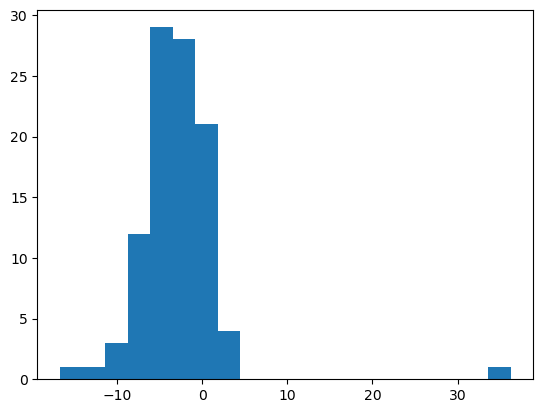

In [169]:
import matplotlib.pyplot as plt
plt.hist(sample_data['diff'], bins=20)

In [171]:
x_bar_diff = sample_data['diff'].mean()
x_bar_diff

-2.877109041242944

In [179]:
#formülü kullanalım: tek örneklem t istatistiği
import numpy as np

n_diff = len(sample_data) 
s_diff = sample_data['diff'].std()
t_stat = (x_bar_diff - 0) / np.sqrt(s_diff**2 / n_diff)
t_stat

-5.601043121928489

### Tek Örneklem T-Testi ile İki Örneklem T-Testi Arasındaki Fark

#### 1. Tek Örneklem T-Testi Nedir?

- **Tanım**: Tek örneklem t-testi, bir örneklemin ortalamasının belirli bir teorik veya beklenen değerden (genellikle 0, 100 vb.) anlamlı şekilde farklı olup olmadığını test etmek için kullanılır.  
- **Formül** (basit hali):  
  $$
  t = \frac{\bar{x} - \mu_0}{\sqrt{\frac{s^2}{n}}}
  $$
  - \(\bar{x}\): Örneklem ortalaması  
  - \(\mu_0\): Beklenen/popülasyon ortalaması (hipotezdeki ortalama)  
  - \(s\): Örneklemin standart sapması  
  - \(n\): Örneklem büyüklüğü  

Bu kod parçasında (örneğin 2008 ve 2012 verilerinden yaratılan **`diff`** sütunu) tek bir örneklem verisi (farklar) üzerinden, “bu ortalama fark sıfır mı?” hipotezi test ediliyor. Dolayısıyla **tek örneklem t-testi** yapılıyor.

---

#### 2. İki Örneklem T-Testi Nedir?

- **Tanım**: İki farklı örneklemin (örneğin, iki grubun) ortalamalarının birbirine eşit olup olmadığını test etmek için kullanılır.  
- **Formül** (bağımsız iki örneklem için):  
  $$
  t = \frac{\bar{x}_1 - \bar{x}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}
  $$
  - \(\bar{x}_1, \bar{x}_2\): İki örneklemin ortalamaları  
  - \(s_1, s_2\): İki örneklemin standart sapmaları  
  - \(n_1, n_2\): İki örneklem büyüklükleri  

Bu testte, iki ayrı grup (örneğin **adult** vs. **child**) için elde edilen ölçümler var ve **iki farklı ortalama** karşılaştırılıyor.

---

### Neden Tek Örneklem T-İstatistiği?

Kod parçasında bir *tek örneklem* t-testinin formülü görmemizin nedeni:

1. **Veri Yapısı**: Yalnızca **tek bir sütunda** (diff) değerler var. Bu sütun 2008 ve 2012 verilerinin farkı. Burada “tek bir örnek” olarak farklar ele alınıyor.  
2. **Test Edilen Hipotez**: “Bu **fark** ortalaması sıfır mı?” Yani \(\mu_0 = 0\).

Dolayısıyla, iki ayrı grup ortalaması yerine, **tek bir dağılım** (farklar dağılımı) üzerinden bir hedef değerden (0) sapma sorgulandığı için **tek örneklem t-testi** söz konusudur.

Bir önceki örnekte ise:

- İki ayrı grup (örneğin **adult** ve **child**) vardı. Her grubun kendi ortalaması ve kendi standart sapması bulunup, **iki bağımsız örneklem t-testi** (bağımsız iki örneklem ortalaması karşılaştırması) uygulanıyordu.

Bu iki testin **temel farkı**:  
- *Tek örneklemde*, aynı sütundan gelen değerlere karşılık bir teorik (sabit) ortalama kıyaslanır.  
- *İki örneklemde*, iki ayrı grubun ortalaması kıyaslanır.


In [185]:
from scipy.stats import t
degrees_of_freedom = n_diff -1
p_value = t.cdf(t_stat, df=degrees_of_freedom)
p_value #reddedilir küçük oldupu için.08 12'den küçüktür. oy oranları düşmüş

9.572537285272413e-08

In [195]:
import pingouin

pingouin.ttest(sample_data['diff'], y=0, alternative='less')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-5.601043,99,less,9.572537e-08,"[-inf, -2.02]",0.560104,1.323e+05,0.999955


pingouin.ttest(sample_data['diff'], y=0, alternative='less'):
pingouin.ttest() fonksiyonu, t-test yapmak için kullanılır. Bu fonksiyon tek örneklem t-testi, bağımsız iki örneklem t-testi veya eşleşmiş iki örneklem t-testi gibi testleri gerçekleştirebilir.

sample_data['diff']: Bu, testin uygulanacağı örneklem verisi. Burada 'diff' sütunu, örneklem farklarını (muhtemelen bir grup ile beklenen değer arasındaki farklar) içeriyor olabilir. Yani, testin yapılacağı veri, 'diff' değerlerinin bir listesidir.

y=0: Bu parametre, testin karşılaştırılacağı beklenen değeri belirtir. Burada, 0 ile karşılaştırma yapılıyor, yani örneklem verisinin 0'a karşı test edilmesi bekleniyor. Bu, tek örneklem t-testinin hipotez testidir. Yani, 'diff' değerlerinin 0'a karşı istatistiksel olarak anlamlı bir fark olup olmadığını test ederiz.

alternative='less': Bu parametre, testin alternatif hipotezini belirtir.

'less' değeri, tek yönlü bir test olduğunu gösterir ve beklenen değerin daha küçük olup olmadığını test eder. Yani, alternatif hipotez 'diff' değerlerinin 0'dan küçük olduğunu öne sürer.
Alternatif hipotez şu şekilde ifade edilir: H1: μ < 0.
Ne Yapılıyor?
Bu kod, tek örneklem t-testini gerçekleştiriyor. Testin hipotezi, örneklem verisinin 0'dan küçük olup olmadığını test eder. Yani, 'diff' verilerinin 0'dan anlamlı şekilde küçük olup olmadığını inceler.

Alternatif hipotez şudur:

H0 (Null Hipotezi): Örneklem ortalaması 0'a eşittir (yani, fark yoktur).
H1 (Alternatif Hipotez): Örneklem ortalaması 0'dan küçüktür.

 **p-val (p-değeri)**
- **p-val = 9.572537e-08 \(\approx 0.0000000957\)**  
  Oldukça küçük bir p-değer olup, genellikle 0.05 anlamlılık düzeyinden çok daha küçüktür. Bu nedenle, **null hipotez** (fark = 0) güçlü bir şekilde reddedilir ve farkın 0’dan küçük olduğu sonucuna varılır.


In [197]:
pingouin.ttest(x=sample_data['repub_percent_08'], 
               y=sample_data['repub_percent_12'], paired=True, 
               alternative='less')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-5.601043,99,less,9.572537e-08,"[-inf, -2.02]",0.217364,1.323e+05,0.696338


pingouin.ttest() fonksiyonu, iki örneklem arasındaki farkları test etmek için kullanılan t-test fonksiyonudur. Burada, eşleşmiş iki örneklem t-testi (paired t-test) yapılacaktır.

2. x=sample_data['repub_percent_08']:
x parametresi, ilk örneklemi temsil eder. Burada sample_data['repub_percent_08'], 2008 yılında Cumhuriyetçi Partinin oy oranlarını içeren veri sütunudur.

3. y=sample_data['repub_percent_12']:
y parametresi, ikinci örneklemi temsil eder. Burada sample_data['repub_percent_12'], 2012 yılında Cumhuriyetçi Partinin oy oranlarını içeren veri sütunudur.

4. paired=True:
paired=True ifadesi, eşleşmiş iki örneklem t-testinin yapılacağını belirtir. Bu, her bir gözlemin bir eşleşmiş çift oluşturduğunu ifade eder. Yani, 2008'deki oy oranı ile 2012'deki oy oranı birbirine bağlıdır ve aynı birimler (örneğin, aynı eyalet ya da bölge) için karşılaştırılmaktadır.

5. alternative='less':
alternative='less' parametresi, tek yönlü bir test yapılacağını belirtir. Yani, 2012 oy oranının 2008'den daha düşük olup olmadığını test ederiz.
Alternatif hipotez: 2012 oy oranı 2008'den daha düşük.
Null hipotez: 2012 oy oranı 2008'le aynı veya daha yüksek.

In [193]:
pingouin.ttest(x=sample_data['repub_percent_08'], 
               y=sample_data['repub_percent_12'], 
               paired=False, alternative='less')





#x=sample_data['repub_percent_08']:
x parametresi, ilk örneklem verisini temsil eder. Burada sample_data['repub_percent_08'], 2008 yılında Cumhuriyetçi Partinin oy oranlarını içeren veri sütunudur.
3. y=sample_data['repub_percent_12']:
y parametresi, ikinci örneklem verisini temsil eder. Burada sample_data['repub_percent_12'], 2012 yılında Cumhuriyetçi Partinin oy oranlarını içeren veri sütunudur.
4. paired=False:
paired=False ifadesi, bu testin bağımsız iki örneklem t-testi olduğunu belirtir. Yani, 2008 ve 2012 yıllarındaki oy oranları arasında bağımsız bir karşılaştırma yapılır. Bu, eşleşmiş t-test (paired t-test) yerine, bağımsız örneklem t-testi yapılacağı anlamına gelir.
Örneğin, 2008 ve 2012'deki veriler, aynı eyalet veya bölgeye ait olabilir, ancak bu testte veriler bağımsız kabul edilir.
5. alternative='less':
alternative='less' parametresi, testin tek yönlü (right-tailed) olduğunu belirtir. Yani, alternatif hipotez, 2012 oy oranının 2008'den daha düşük olduğunu öne sürer.
Alternatif hipotez: 2012 oy oranı 2008'den daha düşük.
Null hipotez: 2012 oy oranı 2008'le aynı veya daha yüksek.
Ne Yapılıyor?
Bu kod, bağımsız iki örneklem t-testini yaparak, 2008 ve 2012 yıllarındaki Cumhuriyetçi Parti'nin oy oranları arasındaki farkın istatistiksel olarak anlamlı olup olmadığını test eder. Alternatif hipotez, 2012 oy oranının 2008'den daha düşük olduğunu öne sürer.



,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.536997,198,less,0.062945,"[-inf, 0.22]",0.217364,0.927,0.454972


### `paired=True` ile `paired=False` Arasındaki Fark

#### 1. **Eşleştirilmiş (Paired) T-Test (`paired=True`)**
- **Amaç**: Aynı gözlemlerin (ya da aynı birimlerin) iki farklı zamanda veya iki farklı koşuldaki ölçümlerini karşılaştırmak.  
  - Örneğin, **aynı ilçede** 2008 seçimlerindeki Cumhuriyetçi oy yüzdesi ile **aynı ilçede** 2012 seçimlerindeki Cumhuriyetçi oy yüzdesi.  
- **Özelliği**: Her satır (örnek) için, “önceki” ve “sonraki” ölçüm birbiriyle **eşleştirilmiştir**.  
- **İstatistiksel Mantık**: Veriler arasındaki farklar üzerinden tek bir örneklem analizi yapılır ve bu farkın ortalamasının sıfırdan farklı olup olmadığı test edilir.  
- **Serbestlik Derecesi (dof)**: Genellikle \(n - 1\) (burada \(n\) eşleştirilmiş gözlem sayısıdır).  

#### 2. **Bağımsız (Unpaired) İki Örneklem T-Test (`paired=False`)**
- **Amaç**: İki **bağımsız** örneklemin (grubun) ortalamalarını karşılaştırmak.  
  - Örneğin, **farklı ilçelerde** (ya da tamamen farklı katılımcılarda) 2008 seçimleri ile 2012 seçimlerini ayrı ayrı ele aldığınızda ve bunların ortalamalarını karşılaştırdığınızda, aslında iki bağımsız topluluk/örneklem kullanırsınız.  
- **Özelliği**: `x` ve `y` dizileri **aynı birimlere** ait değildir, ölçümler bağımsızdır.  
- **İstatistiksel Mantık**: Her grubun (x ve y) ortalaması ve varyansı hesaplanır, iki ortalama arasındaki farkın anlamlılığı test edilir.  
- **Serbestlik Derecesi (dof)**: \(n_x + n_y - 2\) (kaba formül).  

---

### Hangi Durumda Hangisi Kullanılır?

- **`paired=True` (eşleştirilmiş t-testi)**:  
  İki ölçümün **aynı birimlerden** (katılımcı, ilçe, hasta vs.) geldiği durumda tercih edilir. Tek bir birimin iki farklı zaman ya da iki farklı koşuldaki ölçümleri söz konusudur.

- **`paired=False` (bağımsız iki örneklem t-testi)**:  
  İki **farklı** grup (farklı insanlar, farklı ilçeler vs.) karşılaştırılıyorsa, ölçümler arasında eşleştirme ya da tekrar ölçüm yoksa kullanılır.

Özetle, **aynı veri setinde** 2008 ve 2012 oy yüzdeleri gerçekten **aynı ilçeye ait** ise, **eşleştirilmiş t-testi** (`paired=True`) uygun olacaktır. Eğer iki bağımsız grup (hiçbir şekilde eşleştirilmemiş) varsa, **bağımsız t-testi** (`paired=False`) kullanılır.
